# **Convolution and Kernels**

## **Convolution**

### **Definition**

Convolution is basically doing this:

> “Take this small 3×3 calculator (kernel), place it on top of the image, multiply element-wise, sum everything, and write the result into a new image.”



### **Procedure**

1. Place kernel on a region

2. Multiply element-wise

3. Add them up

4. Write to output image


### **Example**

**how to manually compute ONE convolution output pixel**

#### **✅ STEP 1 — We pick a tiny image patch**

Here is our 3×3 image patch:

```
Image (I):
1   2   3
4   5   6
7   8   9
```

This is realistic because every convolution operation works on local 3×3 regions.

---

#### **✅ STEP 2 — We pick a real kernel (filter)**

Let’s use **Sobel horizontal edge detector**, which is a classic kernel:

```
Kernel (K):
-1   0   +1
-2   0   +2
-1   0   +1
```

This detects **horizontal changes** (left–right edges).

---

#### **⚡ STEP 3 — Multiply element by element (no shortcuts)**

We place the kernel on top of the image patch and multiply each pair.

Let’s do it line-by-line.

##### **Row 1:**

```
(I) 1 * (-1) = -1  
(I) 2 * ( 0) = 0  
(I) 3 * (+1) = +3
Sum so far = 2
```

##### **Row 2:**

```
4 * (-2) = -8  
5 * ( 0) = 0  
6 * (+2) = +12
Sum so far = 2 + (-8 + 12) = 6
```

##### **Row 3:**

```
7 * (-1) = -7  
8 * ( 0) = 0  
9 * (+1) = +9
Sum so far = 6 + (-7 + 9) = 8
```

---

#### **🎯 FINAL OUTPUT (one pixel)**

```
Output pixel = 8
```

That is how **ONE** convolution output pixel is calculated.

## **Kernels**

### **Definition**

A **kernel** in computer vision is a **small matrix of numbers**
(usually 3×3, 5×5, or 7×7)

used to **transform** an image by performing a **convolution**.

In corporate-speak:

> “A kernel is a localized computation template that defines *how* each pixel’s neighborhood contributes to a new output pixel.”

In engineering terms:

> “A kernel encodes a mathematical operation. When slid across the image, it extracts patterns like edges, blur, texture, or direction.”


### 🧠 **Formal Definition**

A kernel ( K ) is a matrix used to compute a weighted sum over a local neighborhood of an image ( I ):

[
O(x, y) = \sum_{i} \sum_{j} I(x+i, y+j) \cdot K(i, j)
]

Where:

* ( I ) = input image
* ( K ) = kernel
* ( O ) = output image
* ( (i, j) ) iterate through kernel positions

This is the core of convolution.


### 🔍 **Why a Kernel Exists**

Because a single pixel doesn’t tell you anything useful.

But pixels + their neighbors reveal:

* edges
* corners
* textures
* gradients
* noise
* direction

A kernel **captures a specific pattern**.

Example:

* Sobel-X kernel → vertical edges
* Gaussian kernel → smoothing
* Laplacian kernel → rapid intensity changes

Each kernel is like a mini “lens” that sees a particular structure.


### 🧱 **Kernel Properties**

Every kernel has:

#### 1️⃣ **Size**

Common: 3×3, 5×5
Larger = more contextual understanding

#### 2️⃣ **Weights**

These numbers define *what* the kernel detects:

* negative numbers → highlight dark-to-light changes
* positive numbers → reinforce
* zeros → ignore

#### 3️⃣ **Normalization**

* Some kernels sum to 1
(blurring kernels)

* Some sum to 0
(edge detectors)

* Some sum to >1
(sharpeners)


### **Types of Kernels**

---

#### 1) **Smoothing / Blurring Kernels**

These reduce noise and soften images.

##### **(a) Box Blur (Mean Filter)**

```
1/9 * [
 1 1 1
 1 1 1
 1 1 1
]
```

##### **(b) Gaussian Blur (3×3)**

```
1/16 * [
 1 2 1
 2 4 2
 1 2 1
]
```

##### **(c) Gaussian Blur (5×5)**

```
1/256 * [
 1  4  6  4  1
 4 16 24 16  4
 6 24 36 24  6
 4 16 24 16  4
 1  4  6  4  1
]
```

🔥 Used for: denoising, smoothing before edge detection.

---

#### 2) **Edge Detection Kernels**

These detect intensity changes.

##### **(a) Sobel Operators**

**Sobel X:**

```
[-1 0 +1
 -2 0 +2
 -1 0 +1]
```

**Sobel Y:**

```
[-1 -2 -1
  0  0  0
 +1 +2 +1]
```

##### **(b) Prewitt Operators**

**Prewitt X:**

```
[-1 0 +1
 -1 0 +1
 -1 0 +1]
```

**Prewitt Y:**

```
[-1 -1 -1
  0  0  0
 +1 +1 +1]
```

##### **(c) Scharr Operators** (higher-quality Sobel)

**Scharr X:**

```
[-3 0 +3
 -10 0 +10
 -3 0 +3]
```

##### **(d) Laplacian (2nd derivative)**

```
[0 -1  0
 -1 4 -1
 0 -1  0]
```

---


#### 🎯 3) **Sharpening Kernels**

##### **(a) Standard Sharpen**

```
[ 0 -1  0
 -1  5 -1
 0 -1  0]
```

##### **(b) High-boost filter**

```
[-1 -1 -1
 -1  9 -1
 -1 -1 -1]
```

Used to make images crisp.

---

#### 4) **Emboss / Artistic Kernels**

##### **Emboss**

```
[-2 -1 0
 -1  1 1
 0  1 2]
```

Gives a 3D shaded effect.

##### **Outline**

```
[-1 -1 -1
 -1  8 -1
 -1 -1 -1]
```

Finds outlines/borders.

---

#### 5) **Gradient Magnitude Kernels**

Usually used with Sobel/Prewitt:

```
G = sqrt(Gx^2 + Gy^2)
```

Not a kernel itself → a formula combining two kernels.

---

#### 6) **Custom Kernels (learned by CNNs)**

In CNNs, the “kernels” (filters) are not fixed —
they are learned during training.

Early layers typically learn:

* Edge detectors
* Color blobs
* Gabor-like filters
* Dot and line patterns

Later layers learn:

* Texture patterns
* Shapes
* Object structures

## **Implementation of Convolution and Kernel**

We'll implement all common kernels in NumPy and OpenCV, but in a structured path:

* Step 1 — Load + show image (foundation)
* Step 2 — Implement your own manual convolution function
* Step 3 — Apply blur kernels
* Step 4 — Apply edge-detection kernels
* Step 5 — Apply sharpening + emboss kernels
* Step 6 — Visual comparison grid of all outputs

### **STEP 1 — Load Image (Start Here)**

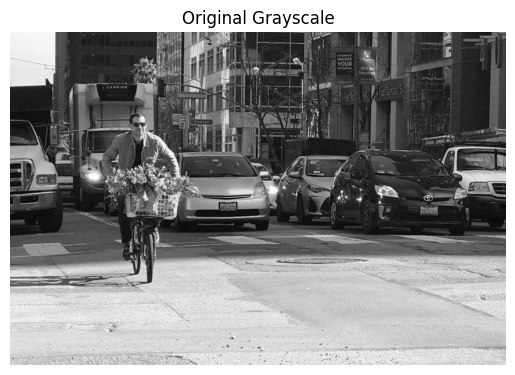

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("sample.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')
plt.show()

### **Step 2 — Implement your own manual convolution function**

We’ll implement it in three small sub-steps:

1. Prepare output array & padding
2. Sliding window over the image
3. Multiply × sum (the actual convolution)



1.   #### **Create Output + Pad Image**

In [2]:
# --- Step 2A: Prepare padded image and output ---
def pad_image(img, pad):
    return np.pad(img, ((pad, pad), (pad, pad)), mode='constant')

# Using a 3x3 kernel → pad = 1
pad = 1
padded = pad_image(gray, pad)

# Output image frame (same size as input)
output = np.zeros_like(gray)

print("Padded shape:", padded.shape)
print("Output shape:", output.shape)

Padded shape: (588, 874)
Output shape: (586, 872)


2. #### **Sliding window over the image**

In [4]:
# --- Step 2B: Sliding window ---
def convolve(image, kernel):
    k = kernel.shape[0]     # kernel size (3 for 3x3)
    pad = k // 2            # how much we padded
    padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')

    output = np.zeros_like(image)   # same size as input

    # Go pixel by pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract local region the size of the kernel
            region = padded[i:i+k, j:j+k]

            # Multiply and sum (actual convolution)
            output[i, j] = np.sum(region * kernel)

    return output

3. #### **Multiply × sum (the actual convolution)**

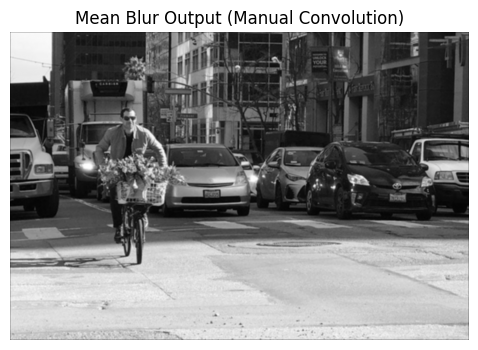

In [5]:
# ----------- Kernel Definitions -----------

# 1) Mean Blur (Box Blur)
kernel_mean = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# 2) Gaussian Blur (3x3)
kernel_gaussian = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# 3) Sobel X (Vertical edges)
kernel_sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# 4) Sobel Y (Horizontal edges)
kernel_sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# 5) Sharpen
kernel_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

# 6) Emboss
kernel_emboss = np.array([
    [-2, -1,  0],
    [-1,  1,  1],
    [ 0,  1,  2]
])



# ------ Test One Kernel (Mean Blur) -------
result_mean = convolve(gray, kernel_mean)

plt.figure(figsize=(6,4))
plt.imshow(result_mean, cmap='gray')
plt.title("Mean Blur Output (Manual Convolution)")
plt.axis('off')
plt.show()


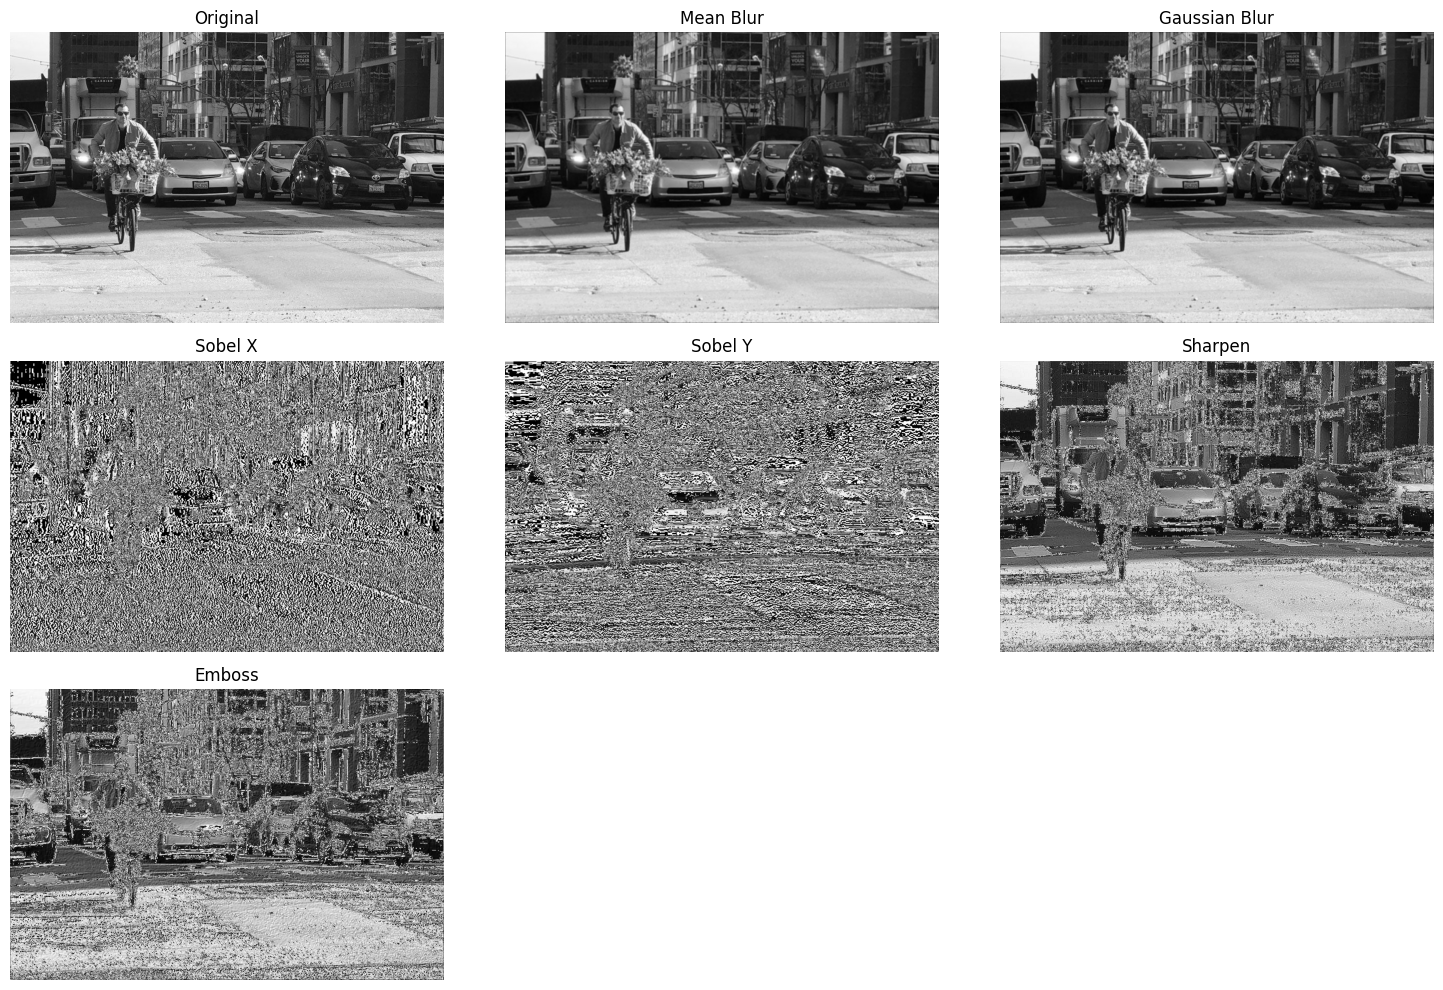

In [6]:
# -----------------------------------------
# Apply ALL kernels using your convolve() function
# -----------------------------------------

results = {
    "Original": gray,
    "Mean Blur": convolve(gray, kernel_mean),
    "Gaussian Blur": convolve(gray, kernel_gaussian),
    "Sobel X": convolve(gray, kernel_sobel_x),
    "Sobel Y": convolve(gray, kernel_sobel_y),
    "Sharpen": convolve(gray, kernel_sharpen),
    "Emboss": convolve(gray, kernel_emboss)
}

# -----------------------------------------
# Plot comparison grid
# -----------------------------------------
plt.figure(figsize=(15, 10))

for i, (name, img_result) in enumerate(results.items()):
    plt.subplot(3, 3, i+1)
    plt.imshow(img_result, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()